# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

In [116]:
%matplotlib inline
from Regressions import *
from proj1_helpers import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train Data loading

In [4]:
y, x_all, ids = load_csv_data('../Data/train.csv')
y[y==-1] = 0

In [5]:
y_all = y
print('Y shape : ', y.shape)
print('X shape : ', x_all.shape)

Y shape :  (250000,)
X shape :  (250000, 30)


In [6]:
x = np.delete(x_all,[4,5,6,12,26,27,28],1)

 which Definition

In [7]:
which = range(1,2) #Change according to desired features in tests

### Scatter plots

Scatter plot for 1th feature :


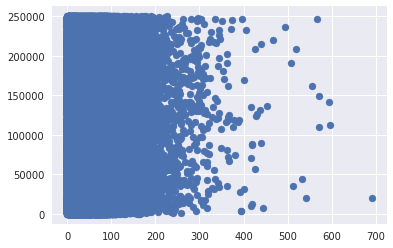

In [8]:
for i in which:
    feature = x[:,i]
    if len(feature[feature==-999]) > 0: #If there is some misplaced value we do not include them in the scatterplot
        print("ATTENTION: missing values ({h}) in {i}th feature removed!".format(i=i, h = len(feature[feature==-999])))
    feature = feature[feature>-999]
    plt.scatter(feature, range(len(feature)))
    print("Scatter plot for {i}th feature :".format(i=i))
    plt.show()

### Histograms

In [9]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

/home/charles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


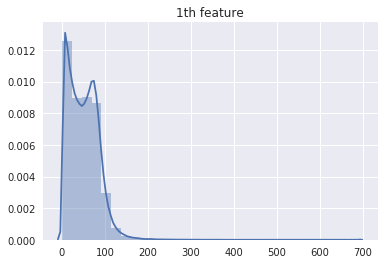

In [10]:
for i in which:
    feature = x_all[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

### Single feature-response plots

Scatter plot for 1th feature :


/home/charles/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/charles/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


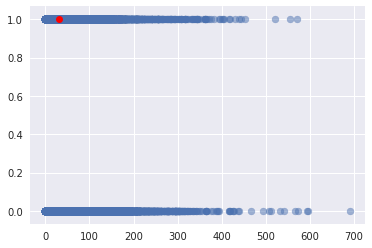

In [11]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

Boxplot for 1th feature :


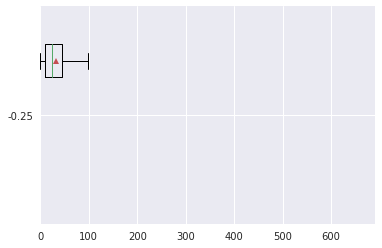

In [12]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


### Features with "too many" -999

Checked to eventually remove them.

In [13]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

feature 0: 15.245600000000001 of Na
feature 1: 0.0 of Na
feature 2: 0.0 of Na
feature 3: 0.0 of Na
feature 4: 0.0 of Na
feature 5: 0.0 of Na
feature 6: 0.0 of Na
feature 7: 0.0 of Na
feature 8: 0.0 of Na
feature 9: 0.0 of Na
feature 10: 0.0 of Na
feature 11: 0.0 of Na
feature 12: 0.0 of Na
feature 13: 0.0 of Na
feature 14: 0.0 of Na
feature 15: 0.0 of Na
feature 16: 0.0 of Na
feature 17: 0.0 of Na
feature 18: 0.0 of Na
feature 19: 39.9652 of Na
feature 20: 39.9652 of Na
feature 21: 39.9652 of Na
feature 22: 0.0 of Na


## explanation for deleting feature 19

due to high correlation between features 6,17,22, we decided to delete the feature 19 from our 
data set since it contained 39% of NANs

# Deletion feature 19

In [14]:
x = np.delete(x_all,[4,5,6,12,19,26,27,28],1)
print(x.shape, y.shape)

(250000, 22) (250000,)


# Inputation of the data 

we know that the features with missing variables are the 1, 19,20,21. Hence we only "treat" these ones by different methods

In [15]:
test_data = inputation(x,method = "mean")

In [16]:
test_data_1 = inputation(x,method = "median")

# Standardization of the data

In [17]:
test_data = standardize_data(test_data)
test_data_1 = standardize_data(test_data_1)

In [20]:
f,W,error = least_squares(y,test_data)

In [21]:
f1,W1, error1 = least_squares(y,test_data_1)

In [22]:
print(max(abs(W-W1)),abs(error-error1))

0.9773489037267211 2.799999999997249e-05


# Prediction test 

In [23]:
y_test, x_all_test, ids_test = load_csv_data('../Data/test.csv')

In [24]:
x_test = np.delete(x_all_test,[4,5,6,12,19,26,27,28],1)

In [25]:
x_test = inputation(x_test,method = "mean")
x_test = standardize_data(x_test)
x_all_test.shape

(568238, 30)

In [29]:
y_pred = predict_labels(W,x_test)

In [30]:
y_pred

array([-1., -1., -1., ..., -1., -1., -1.])

In [31]:
create_csv_submission(ids_test, y_pred, "../Data/test_Charles.csv")

# Test for a new method to predict

a particular interesting feature is the feature PRI_num_jet, the 17 in our case, 22nd feature in the all dataset

In [32]:
x_nj = x[:,17]
x_nj_0 = x_all[x_nj == 0]
x_nj_1 = x_all[x_nj == 1]
x_nj_2 = x_all[x_nj == 2]
x_nj_3 = x_all[x_nj == 3]



for i in range(30):
    per_0 = len(np.where(x_nj_0[:,i] < -500)[0])/len(x_nj_0[:,i])*100
    per_1 = len(np.where(x_nj_1[:,i] < -500)[0])/len(x_nj_1[:,i])*100
    per_2 = len(np.where(x_nj_2[:,i] < -500)[0])/len(x_nj_2[:,i])*100
    per_3 = len(np.where(x_nj_3[:,i] < -500)[0])/len(x_nj_3[:,i])*100
    
    if per_0 != 0 or per_1 != 0 or per_2 != 0 or per_3 != 0:
        print("feature {i}: {p}, {p1}, {p2}, {p3}".format(i = i, p = round(per_0,2), p1 = round(per_1,2),
                                                      p2 = round(per_2,2) ,p3 = round(per_3,2)))

feature 0: 26.15, 9.75, 5.86, 6.66
feature 4: 100.0, 100.0, 0.0, 0.0
feature 5: 100.0, 100.0, 0.0, 0.0
feature 6: 100.0, 100.0, 0.0, 0.0
feature 12: 100.0, 100.0, 0.0, 0.0
feature 23: 100.0, 0.0, 0.0, 0.0
feature 24: 100.0, 0.0, 0.0, 0.0
feature 25: 100.0, 0.0, 0.0, 0.0
feature 26: 100.0, 100.0, 0.0, 0.0
feature 27: 100.0, 100.0, 0.0, 0.0
feature 28: 100.0, 100.0, 0.0, 0.0


from this, we derive the hypothesis that in order to better predict the classification, one may use different models in function of the value of the PRI_num_jet: if the values are 2 or 3, there are almost no missing values

In [33]:
print(len(x_nj_0)/len(x_nj),len(x_nj_1)/len(x_nj),len(x_nj_2)/len(x_nj),len(x_nj_3)/len(x_nj))

0.399652 0.310176 0.201516 0.088656


This could at best predict more accurately for at most 30% of our data

# test for the function split_num_jet

In [34]:
XT = x_all[0:18,:]

In [35]:
D0,Y0,D1,Y1,D2,Y2 = split_num_jet(XT,y[0:18])

In [36]:
print(D0[:,0])

[ 7.53472543e-01  1.99161547e+00 -7.30757049e-01 -5.50551306e-16
 -1.62592055e+00 -5.50551306e-16 -5.20312656e-01  1.31902248e-01]


In [37]:
print(D1[:,0])

[ 1.28384935  0.          0.90202764 -0.8014895   0.29203876 -1.67642624]


In [38]:
print(D2[:,0])

[ 0.68210445  1.13344675 -1.45637331 -0.35917789]


The split function properly

In [39]:
data0,y0, data1,y1, data2,y2 = split_num_jet(x_all,y)

since the matrix has a row of 0 at the end, we don't care for it (no information given) and deleting it allows us to have an invertible matrix

In [40]:
data0_test = np.delete(data0,[data0.shape[1]-1],1)

different tests to see what is going wrong

In [41]:
data2.shape

(72543, 29)

In [42]:
x_all.shape

(250000, 30)

In [43]:
f1,w1,error1 = least_squares(y1,data1)

In [44]:
f0,w0,error0 = least_squares(y0,data0_test)

In [46]:
f2,w2,error2 = least_squares(y2,data2)

In [48]:
def predict_multiple_models(matrix,w0,w1,w2,ids):
    

    #we split the data depending on the different values of num_jet
    data0,id0, data1,id1, data2,id2 = split_num_jet(matrix,ids)

    #in the process of cutting the data in different parts with split_num_jet
    if w0.shape[0] != data0.shape[1]:
        for i in range(data0.shape[1]-w0.shape[0]):
            w0 = np.append(w0,[0])
    
    
    #we predict separatly using the different models
    y0 = predict_labels(w0,data0)
    y1 = predict_labels(w1,data1)
    y2 = predict_labels(w2,data2)
    
    #we merge the prediction to return a single vector of predictions and a vector of ids
    y0 = y0.reshape(len(y0),1)
    y1 = y1.reshape(len(y1),1)
    y2 = y2.reshape(len(y2),1)
    id0 = id0.reshape(len(id0),1)
    id1 = id1.reshape(len(id1),1)
    id2 = id2.reshape(len(id2),1)

    y = np.vstack((y0,y1,y2))
    ids_new = np.vstack((id0,id1,id2))
    
    #merge and sort so the indices are in the right order for the ouput
    predictions = np.hstack((y,ids_new))
    predictions[np.lexsort((predictions[:,0],predictions[:,1]))]
    y = predictions[:,0]
    ids_new = predictions[:,1]
    
    return y,ids_new
    
    

In [58]:
y_test,ids_test = predict_multiple_models(x_all_test,w0,w1,w2,ids_test)

In [51]:
create_csv_submission(ids_test, y_test, "../Data/test_Charles_num_jet.csv")

# Test with CV 

In [52]:
from Regressions import *

In [53]:
def least_squares_prediction(x_test,y_train,x_train):
    f,w,error = least_squares(y_train,x_train)
    pred = x_test.dot(w)
    return pred

In [54]:
def multiple_prediction(x_test,y,x):
    
    ids = np.zeros(x_test.shape[0])
    
    d0,y0,d1,y1,d2,y2 = split_num_jet(x,y)
    data0_test = np.delete(d0,[d0.shape[1]-1],1)    
    
    w0,error0 = least_squares(y0,data0_test)
    w1,error1 = least_squares(y1,d1)
    w2,error2 = least_squares(y2,d2)
    
    y,ids_new = predict_multiple_models(x_test,w0,w1,w2,ids)
    
    return y
    
    

In [55]:
x_all_int = np.hstack((np.ones((x_all.shape[0],1)),x_all))

In [60]:
cross_validation(y,x_all,5,least_squares, )

(<function Regressions.linear_predictor>,
 array([ 2.90424413e-05, -3.52187698e-03, -3.28558737e-03, -1.75365145e-04,
         1.29108496e-02,  2.03426627e-04, -9.93554325e-03,  1.86214895e-01,
        -1.16187651e-04, -1.52046026e+00, -1.03678317e-01,  4.81708850e-02,
         5.90678367e-03,  1.52501568e+00, -6.87222380e-05, -5.34879288e-04,
         1.52700245e+00, -1.89589453e-05,  3.14021654e-04,  1.84750465e-03,
        -1.17472459e-05, -2.12660090e-04, -3.92543245e-04,  9.44344202e-04,
        -4.56784407e-04, -4.29888911e-04,  1.39347766e-03, -3.94961003e-03,
        -6.55558593e-03,  1.51900881e+00]),
 0.25513399999999997,
 0.255104)

In [61]:
cross_validation(y,x_all_int,5,least_squares)

(<function Regressions.linear_predictor>,
 array([ 3.19699913e-01,  3.61774818e-05, -3.57260221e-03, -3.12041220e-03,
        -2.37801823e-04, -1.54238370e-03,  2.24734815e-04, -1.19059316e-02,
         1.71098530e-01, -5.24712732e-05, -1.41942919e+00, -1.08110767e-01,
         4.77593283e-02,  2.26009938e-02,  1.42371273e+00, -1.29912467e-04,
        -4.98257275e-04,  1.42594982e+00, -1.78495752e-04,  4.23771251e-04,
         1.84729330e-03,  1.08887663e-04, -2.50577350e-04, -1.05815289e-01,
        -1.09868728e-04,  1.01683103e-04,  1.71165391e-04, -3.43672690e-05,
        -3.28982541e-03, -5.91644646e-03,  1.41905262e+00]),
 0.25504800000000005,
 0.255212)

In [ ]:
CV(y,x_all,5,multiple_prediction)

In [ ]:
CV(y,x_all_int,5,multiple_prediction)

In [62]:
x_all_test = np.delete(x_all,[23,24,25,26,27,28],1)

In [63]:
cross_validation(y,x_all_test,5,least_squares)

(<function Regressions.linear_predictor>,
 array([ 3.46866498e-05, -3.47231738e-03, -3.14353185e-03,  2.52574977e-05,
         6.73433022e-03,  2.27801373e-04, -1.10961813e-02,  1.76754258e-01,
        -5.67715700e-04, -1.53578266e+00, -1.06352610e-01,  5.22678852e-02,
         4.11569578e-03,  1.54010502e+00, -2.69487077e-04, -2.08418756e-04,
         1.54219424e+00, -1.44546509e-04,  7.19945223e-04,  1.76008186e-03,
         3.06332106e-04, -2.13598322e-04,  2.68127097e-02,  1.53513227e+00]),
 0.255211,
 0.255376)

After removing the data that was supposed to cause colinearity, the idea of fitting multiple model seems to not be fitted for our problem, hence I wonn't go on with it and I will proceed to code the logistic regression instead

In [111]:
w0 = np.zeros((x_all_int.shape[1],1))

In [123]:
Logistic_regression(y,x_all_int,w0,max_iters=1)

0.125
w avant le calcul du gradient  (31, 1)
gradient  (31, 1)
gamma*gran (31, 1)
(31, 1)
(100, 1)
(100, 1)
w:  (31, 1)
Gradient Descent(0/0):loss = [[ 0.  1.  0. ...  1.  0.  0.]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [ 0.  1.  0. ...  1.  0.  0.]
 [ 0.  1.  0. ...  1.  0.  0.]
 [ 0.  1.  0. ...  1.  0.  0.]] w=[[-2.00000000e+00]
 [ 5.32573050e+02]
 [-1.16597750e+02]
 [-1.82115350e+02]
 [-6.99538000e+01]
 [ 1.44851800e+03]
 [ 1.47086455e+03]
 [ 1.44645070e+03]
 [-4.91830000e+00]
 [-4.23850500e+01]
 [-2.69156400e+02]
 [-2.93580000e+00]
 [ 1.57985000e+00]
 [ 1.44847660e+03]
 [-6.06838500e+01]
 [ 3.49400000e-01]
 [ 1.00540000e+00]
 [-8.29860000e+01]
 [ 3.22950000e-01]
 [-1.50695000e+00]
 [-8.06575500e+01]
 [ 1.15920000e+00]
 [-3.66637250e+02]
 [-1.65000000e+00]
 [ 1.33346100e+03]
 [ 1.39873220e+03]
 [ 1.39794360e+03]
 [ 1.41720015e+03]
 [ 1.44895225e+03]
 [ 1.44776135e+03]
 [-1.25486850e+02]]


/home/charles/Desktop/machine learning/projets/ML_CS433_projet1/src/Regressions.py:122: RuntimeWarning: overflow encountered in exp
  return np.exp(z)/(1+np.exp(z))
/home/charles/Desktop/machine learning/projets/ML_CS433_projet1/src/Regressions.py:122: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(z)/(1+np.exp(z))
